In [ ]:
from google.colab import userdata
import os
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
!kaggle datasets download -d /shariful07/student-mental-health
! unzip "student-mental-health.zip"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data= pd.read_csv("Student Mental health.csv")
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


Exercise 1 : Visualizing The Distribution Of CGPA

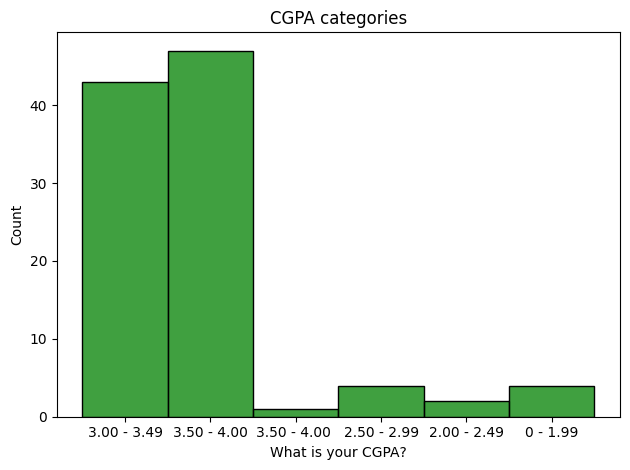

In [11]:
sns.histplot(data["What is your CGPA?"], color="green")
plt.title("CGPA categories")
plt.tight_layout()
plt.show()

Exercise 2: Comparing Anxiety Levels Across Different Genders

Anxiety count by gender Choose your gender
Female    24
Male      10
Name: Do you have Anxiety?, dtype: int64
Percentage of anxiety by gender Choose your gender
Female    32.000000
Male      38.461538
dtype: float64


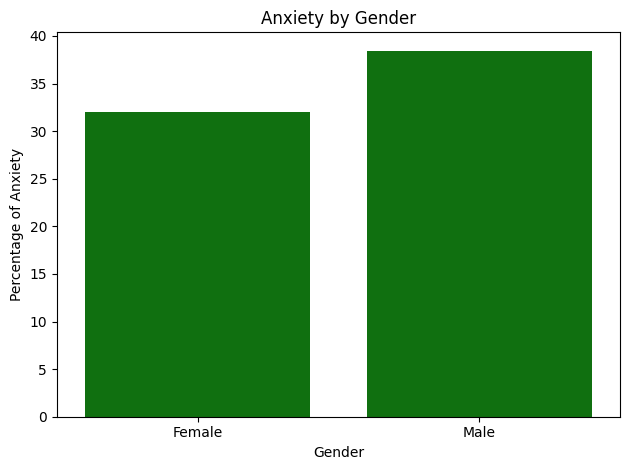

In [39]:
anxiety_by_gender = anxiety_by_gender = data[data['Do you have Anxiety?'] == 'Yes'].groupby('Choose your gender')['Do you have Anxiety?'].count()
gender_counts = data['Choose your gender'].value_counts()
genders=data['Choose your gender'].unique()
percent_anxiety_by_gender = (anxiety_by_gender / gender_counts) * 100
print("Anxiety count by gender", anxiety_by_gender)
print("Percentage of anxiety by gender", percent_anxiety_by_gender)
sns.barplot(y=percent_anxiety_by_gender, x=genders, color="green")
plt.xlabel("Gender")
plt.ylabel("Percentage of Anxiety")
plt.title("Anxiety by Gender")
plt.tight_layout()
plt.show()

Exercise 3: Exploring The Relationship Between Age And Panic Attacks

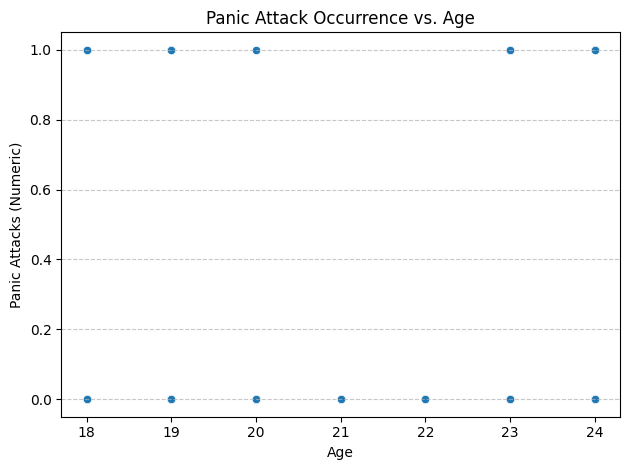

In [43]:
data['Panic Attacks (Numeric)'] = data['Do you have Panic attack?'].map({'Yes': 1, 'No': 0})
sns.scatterplot(x='Age', y='Panic Attacks (Numeric)', data=data)
plt.xlabel('Age')
plt.ylabel('Panic Attacks (Numeric)')
plt.title('Panic Attack Occurrence vs. Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Exercise 4: Visualizing Pairwise Relationships With Seaborn Pair Plot

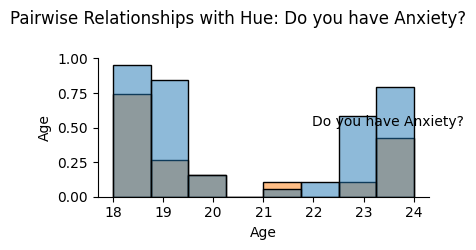

In [51]:
subset_data = data[['Age', 'What is your CGPA?', 'Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']]
hue_condition = 'Do you have Anxiety?'
sns.pairplot(subset_data, hue=hue_condition, diag_kind='hist')
plt.suptitle(f'Pairwise Relationships with Hue: {hue_condition}')
plt.tight_layout()
plt.show()

Exercise 5: Creating A Heatmap To Visualize Correlations

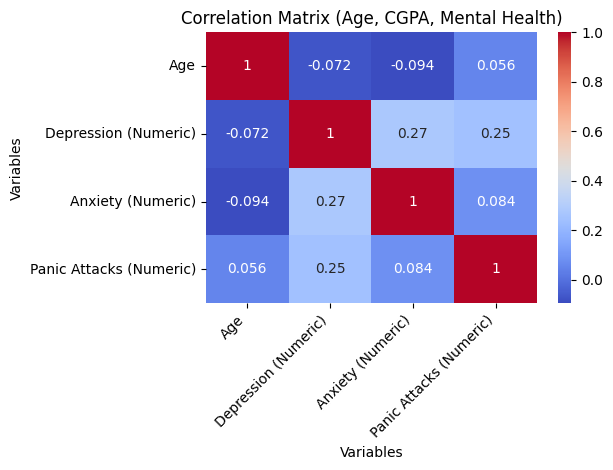

In [54]:
data['Anxiety (Numeric)'] = data['Do you have Anxiety?'].map({'Yes': 1, 'No': 0})
data['Depression (Numeric)'] = data['Do you have Depression?'].map({'Yes': 1, 'No': 0})
subset_data = data[['Age', 'Depression (Numeric)', 'Anxiety (Numeric)', 'Panic Attacks (Numeric)']]
correlation_matrix = subset_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Age, CGPA, Mental Health)')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Exercise 6: Analyzing Distributions And Relationships Using FacetGrid

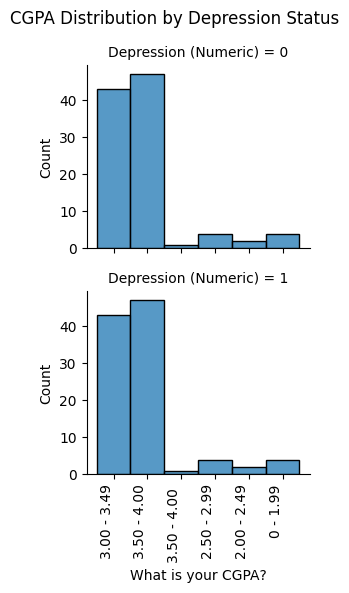

In [68]:
g = sns.FacetGrid(data, row='Do you have Depression?')
g.map(sns.histplot, x=data['What is your CGPA?'])
g.fig.suptitle('CGPA Distribution by Depression Status')
g.set_xlabels('What is your CGPA?')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()